<a href="https://colab.research.google.com/github/YagyanshB/pandas/blob/main/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Processing Using Python

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-song-audio")

print("Path to dataset files:", path)

100%|██████████| 456M/456M [00:05<00:00, 91.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-song-audio/versions/1


In [25]:
path

'/root/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-song-audio/versions/1'

# Importing Required Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

# glob helps in listing out all files in a directory

import librosa
import librosa.display
import IPython.display as ipd

# Importing specific colours for a more structured plotting of data

from itertools import cycle

# Seaborn theme

sns.set_theme(style = "white", palette = None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Terms to Know for Audio Processing:

# Frequency:

*   Describes the differences in wave lengths
*   Interpret frequency as high and low pitches

# Intensity: (db/Power)

*   Describes the amplitude (height) of the wave

# Sample Rate:

*   This is specific to how the computer reads the audio file.
*   More in the form of resolution of a particular audio file.





# Reading in Audio Files:

There are many types of audio files:

```
mp3, wav, m4a, flac, ogg
```



In [38]:
import os

audio_files = glob.glob(os.path.join(path, "**/*.wav"), recursive=True)

In [42]:
# Play Audio File

ipd.Audio(audio_files[3])

In [54]:
y, sr = librosa.load(audio_files[3])


print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')


# y is the raw data of the audio file
# sr is the sample rate

y: [2.1133170e-05 5.7791964e-05 2.4875182e-05 3.1650616e-05 4.7093166e-05
 4.6466492e-05 4.3274915e-05 3.3738022e-05 4.4156805e-05 5.0590104e-05]
shape y: (92703,)
sr: 22050


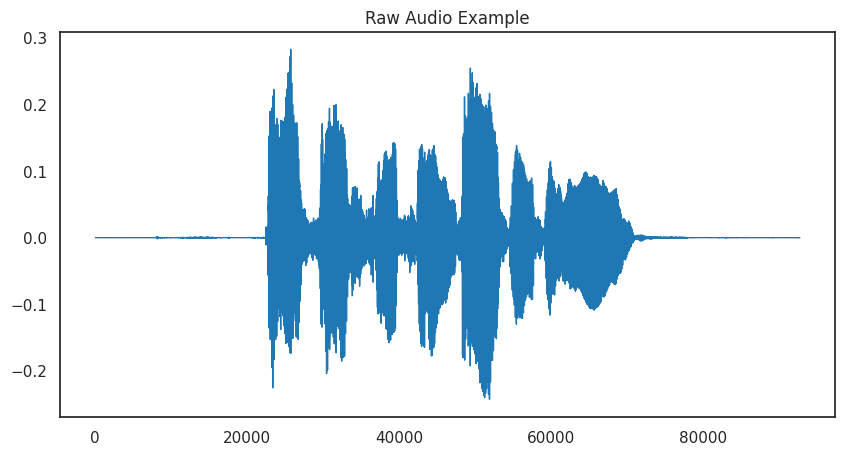

In [64]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title="Raw Audio Example",
                  color = color_pal[0])
plt.show()

In [71]:
y_trimmed, _ = librosa.effects.trim(y, top_db = 20)

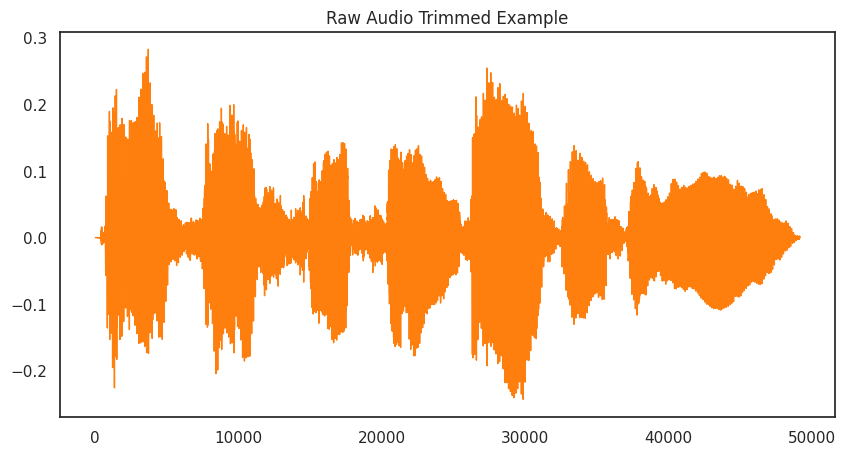

In [72]:
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title="Raw Audio Trimmed Example",
                  color = color_pal[1])
plt.show()

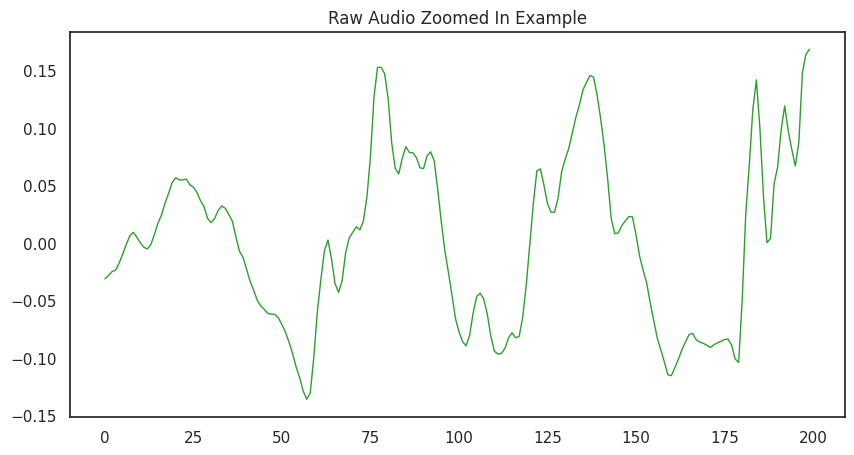

In [79]:
pd.Series(y[22800:23000]).plot(figsize=(10, 5),
                  lw=1,
                  title="Raw Audio Zoomed In Example",
                  color = color_pal[2])
plt.show()

# Spectogram

In [83]:
# Implementing Short Time Fourier Transform

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 182)

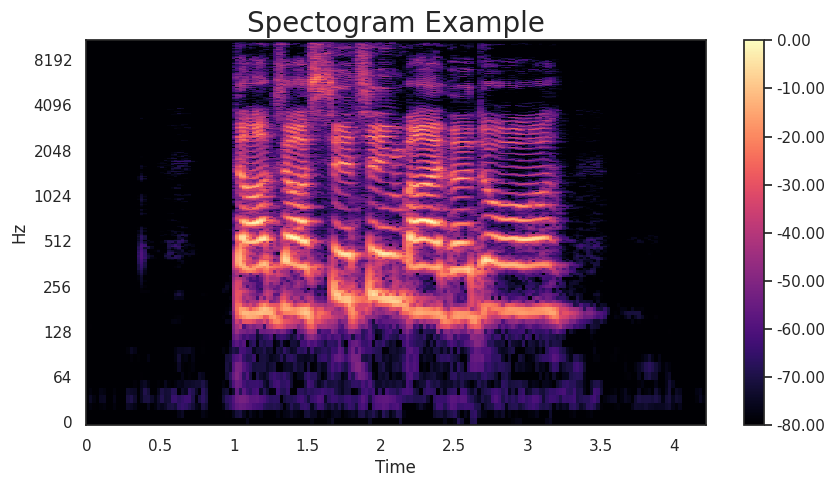

In [86]:
# Plot the transformed audio data

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log')
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# MELL Spectogram:

In [91]:
S = librosa.feature.melspectrogram(y = y, sr = sr, n_mels = 128, )
S.shape

(128, 182)

In [93]:
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

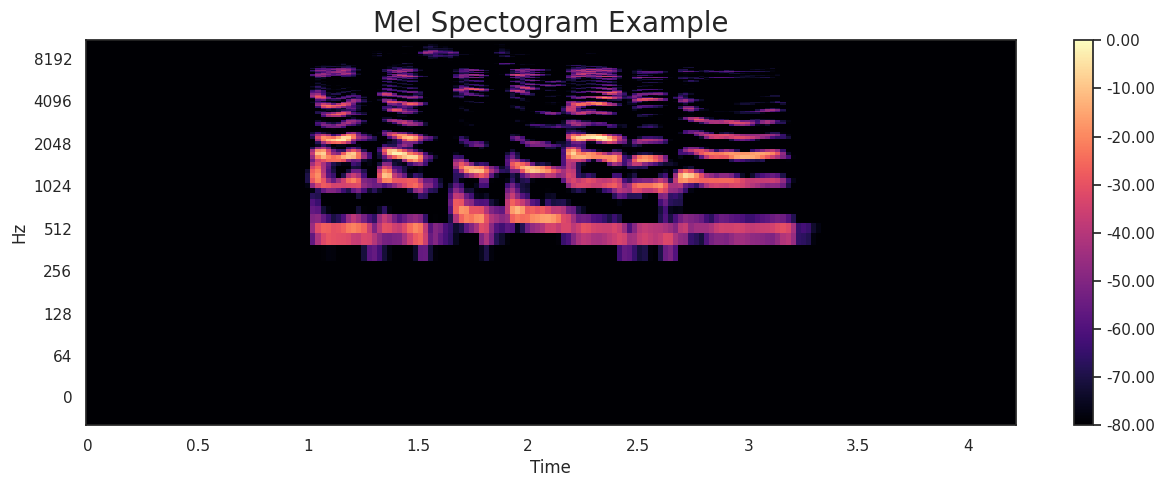

In [97]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plotting the Mel Spectogram

img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log')
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()